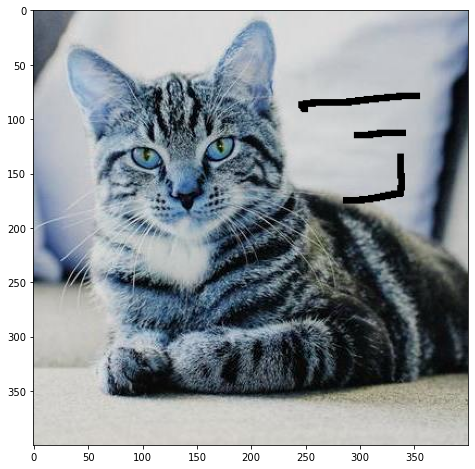

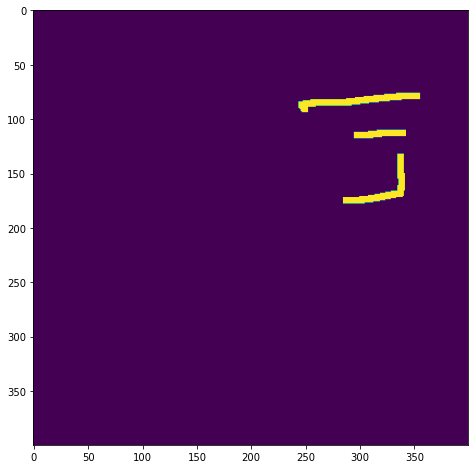

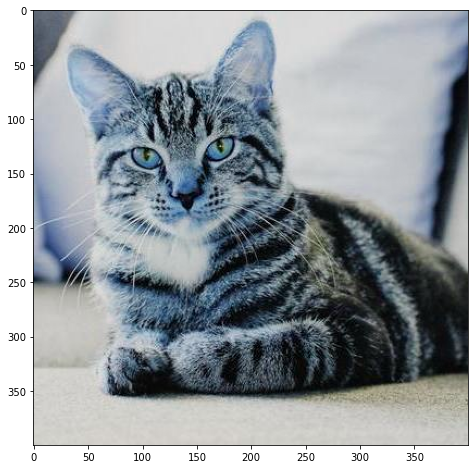

In [59]:
#1.IMAGE RESTORATION:
#(a) Restore a damaged image

import numpy as np
import cv2
import matplotlib.pyplot as plt
#Open the image
img=cv2.imread('dimage_damaged.png')
plt.imshow(img)
plt.show()
#Load the mask
mask=cv2.imread('dimage_mask.png',0)
plt.imshow(mask)
plt.show()
#Inpaint
dst=cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)

#write the output.
cv2.imwrite('dimage_inpainted.png',dst)
plt.imshow(dst)
plt.show()

In [60]:
#(b) Removing Logo's
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)

In [61]:
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparision(img_original,img_filtered,img_title_filtered):
    fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

In [62]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

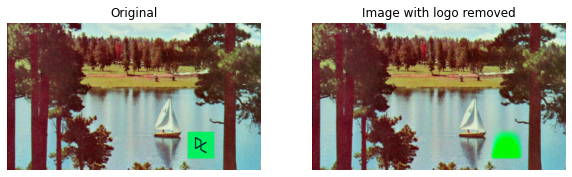

In [63]:
image_with_logo=plt.imread('imlogo.png')

#Initialize the mask
mask=np.zeros(image_with_logo.shape[:-1])

#set the pixels where the logo is to 1
mask[210:272,360:425]=1

#Apply inpainting to remove the logo
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,mask,multichannel=True)

#Show the original and logo removed images
plot_comparision(image_with_logo,image_logo_removed,'Image with logo removed')

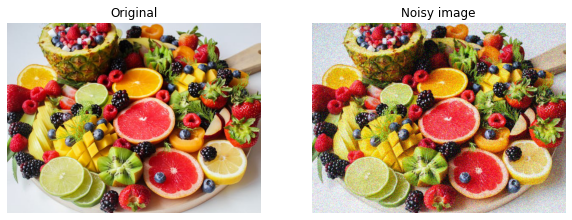

In [64]:
#2.NOISE
#(a) Adding noise

import matplotlib.pyplot as plt
from skimage.util import random_noise

fruit_image= plt.imread('fruitts.jpeg')

#Add noise to the image
noisy_image=random_noise(fruit_image)

#Show the original and resulting image
plot_comparision(fruit_image,noisy_image,'Noisy image')

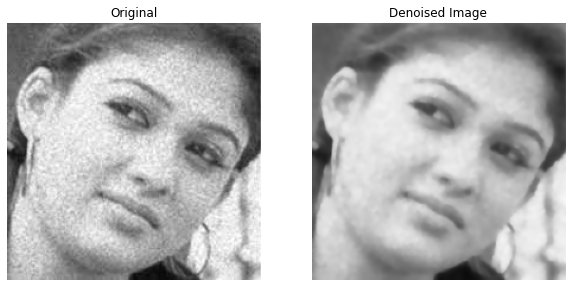

In [65]:
#(b)Reducing noise
from skimage.restoration import denoise_tv_chambolle

noisy_image=plt.imread('noisy.jpg')

#Apply total variation filter denoising
denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)

#Show the noisy and denoised nimage
plot_comparision(noisy_image,denoised_image,'Denoised Image')

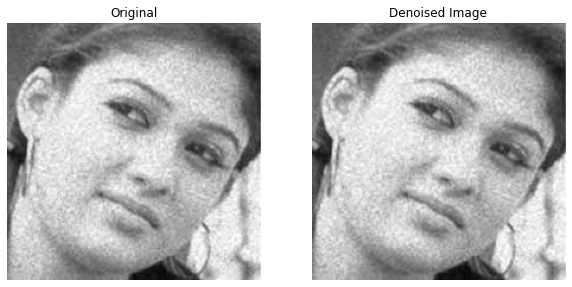

In [66]:
#(b)Reducing noise
import matplotlib.pyplot as plt

from skimage.restoration import denoise_bilateral

landscape_image=plt.imread('noisy.jpg')

#Apply bileteral filter denoising
denoised_image=denoise_bilateral(landscape_image,multichannel=True)

#Show the noisy and denoised nimage
plot_comparision(landscape_image,denoised_image,'Denoised Image')

<ipython-input-69-69d1c2758f20>:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(face_image,n_segments=400)
<ipython-input-69-69d1c2758f20>:8: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments,face_image,kind='avg')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


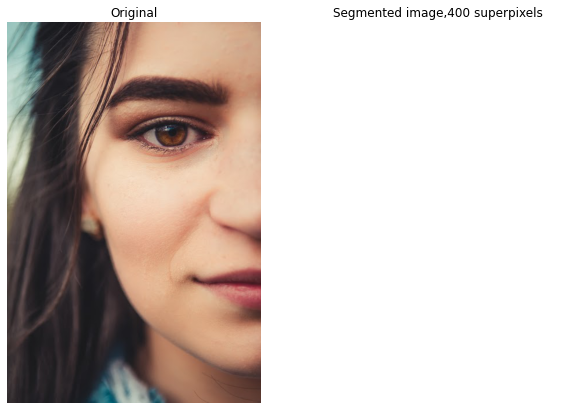

In [69]:
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image=plt.imread('face.jpg')

segments=slic(face_image,n_segments=400)

segmented_image=label2rgb(segments,face_image,kind='avg')

plot_comparision(face_image,segmented_image,'Segmented image,400 superpixels')

In [54]:
#4.CONTOURS
#(a) Contouring shapes

def show_image_contour(image,contours):
    plt.figure()
    for n,contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0],linewidth=3)
    plt.imshow(image,interpolation='nearest',cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

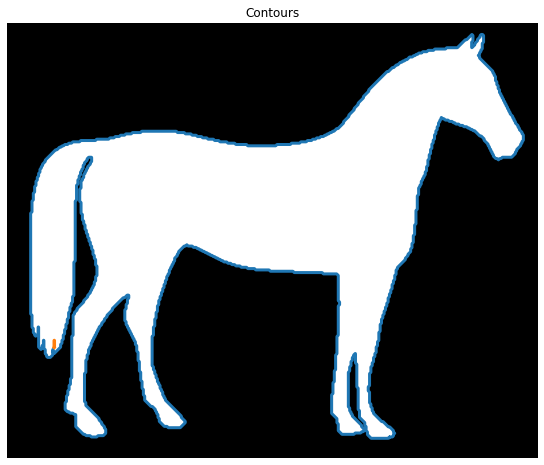

In [55]:
from skimage import measure,data

#Obtain the horse image
horse_image=data.horse()

#Find the contour with a constant level value of 0.8
contours=measure.find_contours(horse_image,level=0.8)

#Show the image with contour found
show_image_contour(horse_image,contours)

<ipython-input-24-95f63e2cd738>:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image_dices=color.rgb2gray(image_dices)


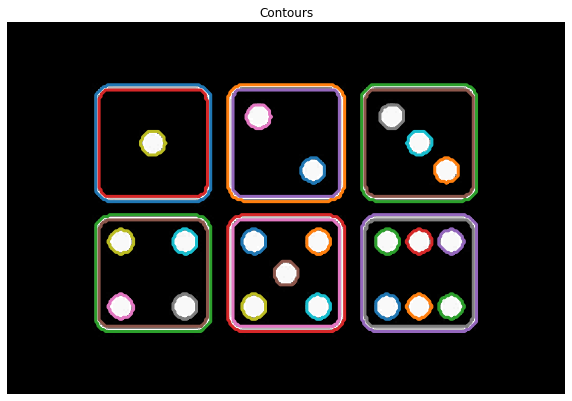

In [24]:
#Find contours of an image that is not binary
from skimage.io import imread
from skimage.filters import threshold_otsu

image_dices=imread('diceimg.png')

#Make the image grayscale
image_dices=color.rgb2gray(image_dices)

#Obtain the optimal thresh value
thresh=threshold_otsu(image_dices)

#Apply thresholding
binary=image_dices>thresh

#Find contour at a constant value of 0.8
contours=measure.find_contours(binary,level=0.8)

#Show the image
show_image_contour(image_dices,contours)

Dices dots number: 21.


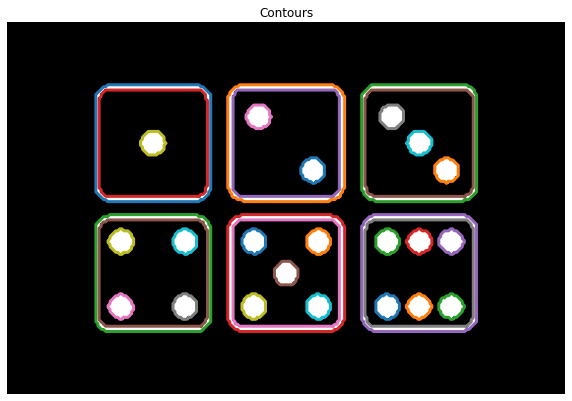

In [26]:
#(c) COUNT THE DOTS IN A DICES IMAGE
#Create list with the shape of each contour
shape_contour=[cnt.shape[0] for cnt in contours]

#set 50 as the maximum size of the dots shape
max_dots_shape=50

#Count dots in contours excluding bigger than dots size
dots_contours=[cnt for cnt in contours if np.shape(cnt)[0]<max_dots_shape]

#Shows all contours found
show_image_contour(binary,contours)

#Print the dices number
print("Dices dots number: {}.".format(len(dots_contours)))

<ipython-input-70-28b7b21cb84c>:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(face_image, n_segments=400)
<ipython-input-70-28b7b21cb84c>:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments,face_image,kind='avg')


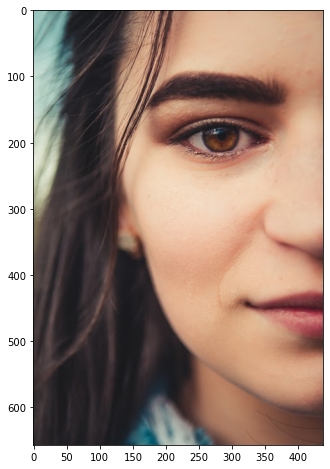

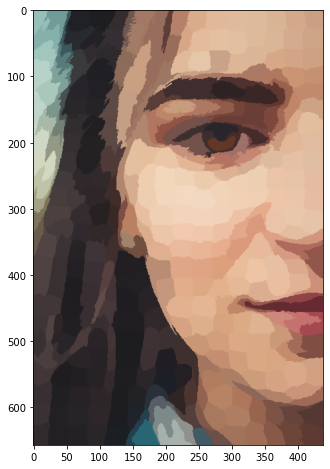

In [70]:
from skimage.segmentation import slic
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np
face_image = plt.imread('face.jpg')
segments = slic(face_image, n_segments=400)
segmented_image=label2rgb(segments,face_image,kind='avg')
plt.imshow(face_image)
plt.show()
plt.imshow((segmented_image * 1).astype(np.uint8))
plt.show()